# 1011: Assigenment 2

Zhengyang Bian (zb612)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1011:-Assigenment-2" data-toc-modified-id="1011:-Assigenment-2-1">1011: Assigenment 2</a></span><ul class="toc-item"><li><span><a href="#1-Load-data" data-toc-modified-id="1-Load-data-1.1">1 Load data</a></span><ul class="toc-item"><li><span><a href="#1.1-Load-sentences" data-toc-modified-id="1.1-Load-sentences-1.1.1">1.1 Load sentences</a></span></li><li><span><a href="#1.2-Load-pre-trained-word-vector" data-toc-modified-id="1.2-Load-pre-trained-word-vector-1.1.2">1.2 Load pre-trained word vector</a></span></li></ul></li><li><span><a href="#2-Model-building" data-toc-modified-id="2-Model-building-1.2">2 Model building</a></span><ul class="toc-item"><li><span><a href="#2.1-Dataset-and-DataLoader" data-toc-modified-id="2.1-Dataset-and-DataLoader-1.2.1">2.1 Dataset and DataLoader</a></span></li><li><span><a href="#2.2-GRU-Model" data-toc-modified-id="2.2-GRU-Model-1.2.2">2.2 GRU Model</a></span></li><li><span><a href="#2.3-CNN-Model" data-toc-modified-id="2.3-CNN-Model-1.2.3">2.3 CNN Model</a></span></li><li><span><a href="#2.4-Evaluate-the-model" data-toc-modified-id="2.4-Evaluate-the-model-1.2.4">2.4 Evaluate the model</a></span></li><li><span><a href="#2.5--Display-the-result" data-toc-modified-id="2.5--Display-the-result-1.2.5">2.5  Display the result</a></span></li></ul></li><li><span><a href="#3-Run-the-baseline-model" data-toc-modified-id="3-Run-the-baseline-model-1.3">3 Run the baseline model</a></span><ul class="toc-item"><li><span><a href="#3.1-GRU-Baseline" data-toc-modified-id="3.1-GRU-Baseline-1.3.1">3.1 GRU Baseline</a></span></li><li><span><a href="#3.2-CNN-Baseline" data-toc-modified-id="3.2-CNN-Baseline-1.3.2">3.2 CNN Baseline</a></span></li></ul></li><li><span><a href="#4.-Hyperparameters" data-toc-modified-id="4.-Hyperparameters-1.4">4. Hyperparameters</a></span><ul class="toc-item"><li><span><a href="#4.1-CNN-Hidden-Size" data-toc-modified-id="4.1-CNN-Hidden-Size-1.4.1">4.1 CNN Hidden Size</a></span></li><li><span><a href="#4.2-RNN-hidden-size" data-toc-modified-id="4.2-RNN-hidden-size-1.4.2">4.2 RNN hidden size</a></span></li><li><span><a href="#4.3-CNN-Kernel-Size" data-toc-modified-id="4.3-CNN-Kernel-Size-1.4.3">4.3 CNN Kernel Size</a></span></li><li><span><a href="#4.4-Interacting-the-two-encoded-sentences:-CNN" data-toc-modified-id="4.4-Interacting-the-two-encoded-sentences:-CNN-1.4.4">4.4 Interacting the two encoded sentences: CNN</a></span></li><li><span><a href="#4.5-Interacting-the-two-encoded-sentences:-RNN" data-toc-modified-id="4.5-Interacting-the-two-encoded-sentences:-RNN-1.4.5">4.5 Interacting the two encoded sentences: RNN</a></span></li><li><span><a href="#4.6-CNN:-FC-Activation" data-toc-modified-id="4.6-CNN:-FC-Activation-1.4.6">4.6 CNN: FC Activation</a></span></li><li><span><a href="#4.7-RNN:-FC-Activation" data-toc-modified-id="4.7-RNN:-FC-Activation-1.4.7">4.7 RNN: FC Activation</a></span></li></ul></li><li><span><a href="#5-Best-Model" data-toc-modified-id="5-Best-Model-1.5">5 Best Model</a></span><ul class="toc-item"><li><span><a href="#5.1-Best-GRU" data-toc-modified-id="5.1-Best-GRU-1.5.1">5.1 Best GRU</a></span></li><li><span><a href="#5.2-Best-CNN" data-toc-modified-id="5.2-Best-CNN-1.5.2">5.2 Best CNN</a></span></li><li><span><a href="#5.3-List-3-correct-and-incorrect-samples-of-the-best-model-(RNN)" data-toc-modified-id="5.3-List-3-correct-and-incorrect-samples-of-the-best-model-(RNN)-1.5.3">5.3 List 3 correct and incorrect samples of the best model (RNN)</a></span></li></ul></li><li><span><a href="#6-Validate-on-MultiNLI" data-toc-modified-id="6-Validate-on-MultiNLI-1.6">6 Validate on MultiNLI</a></span></li><li><span><a href="#7-Fine-Tuning-on-Each-Genre" data-toc-modified-id="7-Fine-Tuning-on-Each-Genre-1.7">7 Fine Tuning on Each Genre</a></span></li></ul></li></ul></div>

In [1]:
# Import relevant codes

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset
from collections import Counter
import pickle as pkl
import random
import string
import pandas as pd
import pdb
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt

PAD_IDX = 0
UNK_IDX = 1
BATCH_SIZE = 32

## 1 Load data
### 1.1 Load sentences

In [2]:
snli_train = pd.read_csv('../data/snli_train.tsv', sep='\t', header=0)
snli_val = pd.read_csv('../data/snli_val.tsv', sep='\t', header=0)

snli_train.head()

,sentence1,sentence2,label
0,A young girl in a pink shirt sitting on a dock...,A young girl watching the sunset over the water .,neutral
1,A woman is smiling while the man next to her i...,Two people are next to each other .,entailment
2,"Across the river , you can see a large building .",The large building is full of apartments and t...,neutral
3,a man in white shorts and a black shirt is par...,A man is riding a jetski on the ocean .,contradiction
4,Four black dogs run together on bright green g...,Four dogs are preparing to be launched into sp...,contradiction


### 1.2 Load pre-trained word vector

In [3]:
def load_vectors(fname, vocab_size=20000):
    with open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore') as file:
        n, d = map(int, file.readline().split())
        cnt = 0
        id2token = ['<pad>', '<unk>']
        token2id = dict()
        lookup = [[0 for i in range(300)], [0 for i in range(300)]]
        for line in file:
            tokens = line.rstrip().split(' ')
            id2token.append(tokens[0])
            token2id[tokens[0]] = cnt+2
            lookup.append([float(x) for x in tokens[1:]])
            cnt += 1
            if cnt == vocab_size:
                break
        # First dimension is being passed to Embedding as ‘num_embeddings’(vocab size), 
        # second as ‘embedding_dim’.
        lookup = np.array(lookup)
    return id2token, token2id, lookup

id2token, token2id, lookup = load_vectors('../res/wiki-news-300d-1M.vec')

In [4]:
def tokenize_preprocess(data):
    target_map = {'neutral': 0, 'entailment': 1, 'contradiction': 2}
    tokens_1 = [sent.split() for sent in data['sentence1']]
    tokens_2 = [sent.split() for sent in data['sentence2']]
    targets = [target_map[x] for x in data['label']]
    return tokens_1, tokens_2, targets

snli_train_tokens_1, snli_train_tokens_2, snli_train_targets = tokenize_preprocess(snli_train)
snli_val_tokens_1, snli_val_tokens_2, snli_val_targets = tokenize_preprocess(snli_val)

In [5]:
def tokens2index_dataset(tokens_data):
    index_data = []
    for tokens in tokens_data:
        indices = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        index_data.append(indices)
    return index_data
snli_train_index_1 = tokens2index_dataset(snli_train_tokens_1)
snli_train_index_2 = tokens2index_dataset(snli_train_tokens_2)
snli_val_index_1 = tokens2index_dataset(snli_val_tokens_1)
snli_val_index_2 = tokens2index_dataset(snli_val_tokens_2)

## 2 Model building
### 2.1 Dataset and DataLoader

In [6]:
MAX_SENTENCE_LENGTH = 50

def reverseMap(order):
    tmp = [(b, a) for a, b  in enumerate(order)]
    B, A = zip(*tmp)
    res = np.array(A)[np.argsort(B)]
    res = res.tolist()
    return res

class inferDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list_1, data_list_2, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list_1 = data_list_1
        self.data_list_2 = data_list_2
        self.target_list = target_list
        assert (len(self.data_list_1) == len(self.data_list_2) == len(self.target_list))

    def __len__(self):
        return len(self.data_list_1)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_1_idx = self.data_list_1[key][:MAX_SENTENCE_LENGTH]
        token_2_idx = self.data_list_2[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key] 
        return [token_1_idx, len(token_1_idx), token_2_idx, len(token_2_idx), label]

def infer_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length (all data, sentence has the same length; so we can
    convert it into a matrix and further into a tensor)
    """   
    label_list = []
    data_1_list = []
    data_2_list = []
    label_2_list = []
    length_1_list = []
    length_2_list = []
    for datum in batch:
        label_list.append(datum[4])
        length_1_list.append(datum[1])
        length_2_list.append(datum[3])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                    pad_width=((0,MAX_SENTENCE_LENGTH-len(datum[0]))), 
                                    mode="constant", constant_values=0)
        data_1_list.append(padded_vec.tolist())
        padded_vec = np.pad(np.array(datum[2]), 
                                    pad_width=((0,MAX_SENTENCE_LENGTH-len(datum[2]))), 
                                    mode="constant", constant_values=0)
        data_2_list.append(padded_vec.tolist())
        
        order_1 = np.argsort(length_1_list)[::-1].tolist()
        order_2 = np.argsort(length_2_list)[::-1].tolist()
        
        rev_order_1 = reverseMap(order_1)
        rev_order_2 = reverseMap(order_2)
        
        tmp_asset = np.arange(len(batch))
        assert ((tmp_asset[order_1][rev_order_1] == tmp_asset).all())
        assert ((tmp_asset[order_2][rev_order_2] == tmp_asset).all())

    return [torch.from_numpy(np.array(data_1_list))[order_1],
            torch.LongTensor(length_1_list)[order_1], 
            torch.LongTensor(rev_order_1),
            torch.from_numpy(np.array(data_2_list))[order_2], 
            torch.LongTensor(length_2_list)[order_2],
            torch.LongTensor(rev_order_2),
            torch.LongTensor(label_list)]



BATCH_SIZE = 32
snli_train_dataset = inferDataset(snli_train_index_1, snli_train_index_2, snli_train_targets)
snli_train_loader = torch.utils.data.DataLoader(dataset=snli_train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=infer_collate_func,
                                           shuffle=True)
snli_val_dataset = inferDataset(snli_val_index_1, snli_val_index_2, snli_val_targets)
snli_val_loader = torch.utils.data.DataLoader(dataset=snli_val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=infer_collate_func,
                                           shuffle=True)

### 2.2 GRU Model

In [7]:
class GRU(nn.Module):
    def __init__(self, weight, hidden_size):
        '''
        GRU Model
        '''
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding.from_pretrained(weight, freeze = False)
        emb_size = weight.shape[1]
        self.gru = nn.GRU(emb_size, hidden_size, num_layers = 1, batch_first=True, bidirectional= True) 
        # The first dimension is batch dimension
        self.linear1 = nn.Linear(hidden_size * 2 * 2, out_features=100)
        self.linear2 = nn.Linear(100, out_features=3)

    def init_hidden(self, batch_size, cuda = True):
        # Function initializes the activation of recurrent neural net at timestep 0
        # Needs to be in format (num_layers, batch_size, hidden_size)
        if cuda:
            hidden = torch.randn(2, batch_size, self.hidden_size).cuda()
        else:
            hidden = torch.randn(2, batch_size, self.hidden_size)
        return hidden

    def forward(self, x, x_lengths, rev_order_x,  y, y_lengths, rev_order_y):
        batch_size, seq_len = x.size()
        self.hidden_1 = self.init_hidden(batch_size, x.is_cuda)

        # get embedding of characters
        embed_x = self.embedding(x)
        embed_y = self.embedding(y)
        
        # Sort before RNN
        embed_x = torch.nn.utils.rnn.pack_padded_sequence(embed_x, x_lengths, batch_first=True)
        # GRU
        _, hidden_x = self.gru(embed_x, self.hidden_1)
        # output_x, _ = torch.nn.utils.rnn.pad_packed_sequence(output_x, batch_first=True)
        # Get the last hidden 
        out_x = hidden_x.transpose(0, 1)
        out_x = out_x.contiguous().view(batch_size, -1)
        out_x = out_x[rev_order_x]
        
        #The same for y (Do we need to re-initialize the hidden?)
        self.hidden_2 = self.init_hidden(batch_size, x.is_cuda)
        embed_y = torch.nn.utils.rnn.pack_padded_sequence(embed_y, y_lengths, batch_first=True)
        _, hidden_y = self.gru(embed_y, self.hidden_2)
        # output_y, _ = torch.nn.utils.rnn.pad_packed_sequence(output_y, batch_first=True)
        out_y = hidden_y.transpose(0, 1)
        out_y = out_y.contiguous().view(batch_size, -1)
        out_y = out_y[rev_order_y]
        
        # Concat x and y before linear transformation
        output = torch.cat([out_x, out_y], dim = 1)

        output = self.linear1(output)
        output = F.softmax(output, dim = 0)
        res = self.linear2(output)
        
        return res

### 2.3 CNN Model

In [8]:
class CNN(nn.Module):
    def __init__(self, weight, hidden_size):
        '''
        CNN Model
        '''
        super(CNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding.from_pretrained(weight, freeze = False)
        emb_size = weight.shape[1]
        self.conv1 = nn.Conv1d(emb_size, hidden_size, kernel_size=3, padding=1) 
        self.conv2 = nn.Conv1d(hidden_size, hidden_size, kernel_size=3, padding=1)
        self.linear1 = nn.Linear(hidden_size * 2 , out_features=50)
        self.linear2 = nn.Linear(50, out_features=3)
        
    def forward(self, x, x_lengths, rev_order_x,  y, y_lengths, rev_order_y):
        batch_size, seq_len = x.size()
        
        x = x[rev_order_x]
        y = y[rev_order_y]
        
        embed_x = self.embedding(x)
        embed_y = self.embedding(y)
                
        hidden_x = self.conv1(embed_x.transpose(1, 2)).transpose(1, 2) 
        hidden_x = F.relu(hidden_x)
        
        hidden_x = self.conv2(hidden_x.transpose(1, 2)).transpose(1, 2) 
        hidden_x = F.relu(hidden_x)
        
        hidden_x = torch.max(hidden_x, dim=1)[0]
                
        # The same for y
        
        hidden_y = self.conv1(embed_y.transpose(1, 2)).transpose(1, 2) 
        hidden_y = F.relu(hidden_y)
                
        hidden_y = self.conv2(hidden_y.transpose(1, 2)).transpose(1, 2) 
        hidden_y = F.relu(hidden_y)
        
        hidden_y = torch.max(hidden_y, dim=1)[0]
                
        # Concat x and y before linear transformation
        output = torch.cat([hidden_x, hidden_y], dim = 1) 
        
        output = self.linear1(output)
        output = F.softmax(output, dim=0)
        res = self.linear2(output)
        
        return res

### 2.4 Evaluate the model
The function for evaluating the model

In [9]:
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    loss = 0
    model.eval()
    with torch.no_grad():
        for x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels in loader:
            labels_batch = labels.cuda()
            outputs = F.softmax(model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                                      y.cuda(), y_lengths.cuda(), rev_order_y.cuda()), dim=1)
            loss += float(criterion(outputs, labels_batch))
            predicted = outputs.max(1, keepdim=True)[1]
            total += labels_batch.size(0)
            correct += predicted.eq(labels_batch.view_as(predicted)).sum().item()
    return (100 * correct / total), loss / len(loader)

### 2.5  Display the result
Display the result in a clear way.

In [10]:
def result_reader(prefix, suffix):
    max_val = dict()
    no_para = dict()
    for s_ in suffix:
        run_name = prefix + s_
        res = pkl.load(open('../model/'+run_name+'_res.pkl', 'rb'))
        para = torch.load(open('../model/'+run_name+'_para.pt', 'rb'), map_location=torch.device('cpu'))
        disp_val = '<table><tr><td>' +\
                    '</td><td>'.join(['Epoch '+str(x+1) for x in range(len(res['val_acc_list']))]) + \
                    '</td></tr><tr><td>' +\
                    '</td><td>'.join([str(x) for x in (res['val_acc_list'])]) +\
                    '</tr></table>'
        display(HTML('Model: ' + run_name + '; Validation accuracy: '))
        display(HTML('Number of parameters: ' + str(sum([x.numel() for x in para.values()]))))
        display(HTML(disp_val))
        max_val[s_] = max(res['val_acc_list'])
        no_para[s_] = sum([x.numel() for x in para.values()])
        plt.figure(0)
        plt.plot(res['it_list'], res['train_acc_list'], label = 'Train Acc')
        plt.plot(res['it_list'], res['val_acc_list'], label = 'Val Acc')
        plt.title(run_name + ' Accuracy')
        plt.legend()
        plt.savefig('../img/'+run_name + '.png')
        plt.savefig('../img/'+run_name + '.eps')
        plt.close()
        plt.figure(1, figsize=(8, 2))
        plt.subplot(1, 2, 1)
        plt.plot(res['it_list'], res['train_acc_list'], label = 'Train Acc')
        plt.plot(res['it_list'], res['val_acc_list'], label = 'Val Acc')
        plt.title(run_name + ' Accuracy')
        plt.subplot(1, 2, 2)
        plt.plot(res['it_list'], res['train_loss_list'], label = 'Train Loss')
        plt.plot(res['it_list'], res['val_loss_list'], label = 'Val Loss')
        plt.title(run_name + ' Loss')
        plt.legend()
        plt.show()
        
    def boldMax(x, x_list):
        if x == max(x_list):
            return '<span style = \"font-weight: bold\">' + str(x) + '</span>'
        else:
            return str(x)
    res = pd.DataFrame(columns = suffix, index = ['max accuracy','no. of parameters' ])
    res.loc['max accuracy'] = max_val
    res.loc['no. of parameters'] = no_para
    display(HTML('The best hyperparameter: ' + \
    ''.join(res.columns[res.loc['max accuracy']== max(res.loc['max accuracy'])])))
    display(res)
    with open('../img/'+ prefix[:-1] + '.tex', 'w') as f:
        print('%{}\n'.format(prefix[:-1]) + '\\begin{table}[H]\n\\centering\n' + res.to_latex() + '\\end{table}', file = f)


In [39]:
tmp = pd.DataFrame([[1, 2, 3], [2, 1, 3]], index = ['C', 'A'], columns = ['1', '2', '3'])

In [43]:
tmp.style.applymap(lambda x:'font-weight: bold',subset=pd.IndexSlice['A', :])

,1,2,3
C,1,2,3
A,2,1,3


## 3 Run the baseline model

### 3.1 GRU Baseline

In [81]:
run_name = 'GRU_bench'
torch.backends.cudnn.benchmark = True

weight = torch.FloatTensor(lookup).cuda()
model = GRU(weight = weight, hidden_size=300).cuda()

learning_rate = 0.0005
num_epochs = 15 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# freeze
freeze_mat = torch.cat([torch.zeros([1, 300]), torch.ones([1, 300]), torch.zeros([20000, 300])]).cuda()
h = model.embedding.weight.register_hook(lambda grad: grad * freeze_mat)

# Plot prepare
it = 0
res = {
    'it_list' : [],
    'train_loss_list' : [],
    'val_loss_list' : [],
    'train_acc_list' : [],
    'val_acc_list' : [] 
}

# print(model.embedding.weight[:3, :5])
for epoch in range(num_epochs):
    for i, (x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels) in enumerate(snli_train_loader):
        
        it += 1
        model.train()
        optimizer.zero_grad()
        # Forward pass
        outputs = model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                        y.cuda(), y_lengths.cuda(), rev_order_y.cuda())
        loss = criterion(outputs, labels.cuda())

        # Backward and optimize
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print('.', end='')
    # validate
    train_acc, train_loss = test_model(snli_train_loader, model)
    val_acc, val_loss = test_model(snli_val_loader, model)

    print('\nEpoch: [{}/{}], Validation Acc: {}'.format(
        epoch+1, num_epochs, val_acc))

    # Plot prepare
    res['it_list'].append(it)
    res['train_acc_list'].append(train_acc)
    res['train_loss_list'].append(train_loss)
    res['val_acc_list'].append(val_acc)
    res['val_loss_list'].append(val_loss)
            
# after training, save the model 
torch.save(model.state_dict(), '../model/'+run_name+'_para.pt')
pkl.dump(res, open('../model/'+run_name+'_res.pkl', 'wb'))

................................
Epoch: [1/15], Validation Acc: 60.1
................................
Epoch: [2/15], Validation Acc: 62.7
................................
Epoch: [3/15], Validation Acc: 64.2
................................
Epoch: [4/15], Validation Acc: 66.3
................................
Epoch: [5/15], Validation Acc: 67.3
................................
Epoch: [6/15], Validation Acc: 68.5
................................
Epoch: [7/15], Validation Acc: 69.5
................................
Epoch: [8/15], Validation Acc: 69.1
................................
Epoch: [9/15], Validation Acc: 69.4
................................
Epoch: [10/15], Validation Acc: 69.5
................................
Epoch: [11/15], Validation Acc: 67.8
................................
Epoch: [12/15], Validation Acc: 68.1
................................
Epoch: [13/15], Validation Acc: 69.2
................................
Epoch: [14/15], Validation Acc: 69.1
.............................

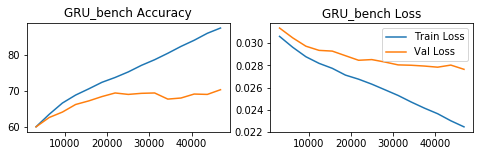

,
max accuracy,70.4
no. of parameters,7204603


In [115]:
result_reader('GRU_bench', [''])

### 3.2 CNN Baseline

In [18]:
run_name = 'CNN_bench'
torch.backends.cudnn.benchmark = True

weight = torch.FloatTensor(lookup).cuda()
model = CNN(weight = weight, hidden_size=200).cuda()

learning_rate = 0.0002
num_epochs = 15 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# freeze
freeze_mat = torch.cat([torch.zeros([1, 300]), torch.ones([1, 300]), torch.zeros([20000, 300])]).cuda()
h = model.embedding.weight.register_hook(lambda grad: grad * freeze_mat)

# Plot prepare
it = 0
res = {
    'it_list' : [],
    'train_loss_list' : [],
    'val_loss_list' : [],
    'train_acc_list' : [],
    'val_acc_list' : [] 
}

# print(model.embedding.weight[:3, :5])
for epoch in range(num_epochs):
    train_acc = 0
    train_loss = 0
    for i, (x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels) in enumerate(snli_train_loader):
        it += 1
        model.train()
        optimizer.zero_grad()
        # Forward pass
        outputs = model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                        y.cuda(), y_lengths.cuda(), rev_order_y.cuda())
        loss = criterion(outputs, labels.cuda())
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            print('.', end='')
    
    # validate
    train_acc, train_loss = test_model(snli_train_loader, model)
    val_acc, val_loss = test_model(snli_val_loader, model)
    
    print('\nEpoch: [{}/{}], Validation Acc: {}'.format(
        epoch+1, num_epochs, val_acc))

    # Plot prepare
    res['it_list'].append(it)
    res['train_acc_list'].append(train_acc)
    res['train_loss_list'].append(train_loss)
    res['val_acc_list'].append(val_acc)
    res['val_loss_list'].append(val_loss)
            
# after training, save the model 
torch.save(model.state_dict(), '../model/'+run_name+'_para.pt')
pkl.dump(res, open('../model/'+run_name+'_res.pkl', 'wb'))

................................
Epoch: [1/15], Validation Acc: 58.4
................................
Epoch: [2/15], Validation Acc: 61.6
................................
Epoch: [3/15], Validation Acc: 63.9
................................
Epoch: [4/15], Validation Acc: 63.3
................................
Epoch: [5/15], Validation Acc: 64.0
................................
Epoch: [6/15], Validation Acc: 64.9
................................
Epoch: [7/15], Validation Acc: 66.7
................................
Epoch: [8/15], Validation Acc: 66.1
................................
Epoch: [9/15], Validation Acc: 65.4
................................
Epoch: [10/15], Validation Acc: 67.2
................................
Epoch: [11/15], Validation Acc: 67.1
................................
Epoch: [12/15], Validation Acc: 66.3
................................
Epoch: [13/15], Validation Acc: 66.0
................................
Epoch: [14/15], Validation Acc: 65.4
.............................

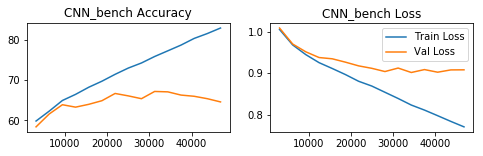

,
max accuracy,67.2
no. of parameters,6321203


In [116]:
result_reader('CNN_bench', [''])

## 4. Hyperparameters

### 4.1 CNN Hidden Size

In [21]:
for i_hid_size in [50, 100, 150, 300, 400, 500]:
    run_name = 'CNN_hid_size_' + str(i_hid_size)
    torch.backends.cudnn.benchmark = True

    weight = torch.FloatTensor(lookup).cuda()
    model = CNN(weight = weight, hidden_size=i_hid_size).cuda()
    learning_rate = 0.0002
    num_epochs = 15
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    freeze_mat = torch.cat([torch.zeros([1, 300]), torch.ones([1, 300]), torch.zeros([20000, 300])]).cuda()
    h = model.embedding.weight.register_hook(lambda grad: grad * freeze_mat)
    it = 0
    res = {
        'it_list' : [],
        'train_loss_list' : [],
        'val_loss_list' : [],
        'train_acc_list' : [],
        'val_acc_list' : [] 
    }
    for epoch in range(num_epochs):
        train_acc = 0
        train_loss = 0
        for i, (x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels) in enumerate(snli_train_loader):
            it += 1
            model.train()
            optimizer.zero_grad()
            outputs = model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                            y.cuda(), y_lengths.cuda(), rev_order_y.cuda())
            loss = criterion(outputs, labels.cuda())
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
                print('.', end='')
        # validate
        train_acc, train_loss = test_model(snli_train_loader, model)
        val_acc, val_loss = test_model(snli_val_loader, model)
        print('\nEpoch: [{}/{}], Validation Acc: {}'.format(
            epoch+1, num_epochs, val_acc))
        # Plot prepare
        res['it_list'].append(it)
        res['train_acc_list'].append(train_acc)
        res['train_loss_list'].append(train_loss)
        res['val_acc_list'].append(val_acc)
        res['val_loss_list'].append(val_loss)
    # after training, save the model 
    torch.save(model.state_dict(), '../model/'+run_name+'_para.pt')
    pkl.dump(res, open('../model/'+run_name+'_res.pkl', 'wb'))

................................
Epoch: [1/15], Validation Acc: 55.8
................................
Epoch: [2/15], Validation Acc: 58.4
................................
Epoch: [3/15], Validation Acc: 58.9
................................
Epoch: [4/15], Validation Acc: 60.6
................................
Epoch: [5/15], Validation Acc: 62.0
................................
Epoch: [6/15], Validation Acc: 62.0
................................
Epoch: [7/15], Validation Acc: 62.9
................................
Epoch: [8/15], Validation Acc: 62.7
................................
Epoch: [9/15], Validation Acc: 64.2
................................
Epoch: [10/15], Validation Acc: 62.9
................................
Epoch: [11/15], Validation Acc: 63.5
................................
Epoch: [12/15], Validation Acc: 62.3
................................
Epoch: [13/15], Validation Acc: 62.7
................................
Epoch: [14/15], Validation Acc: 64.5
.............................

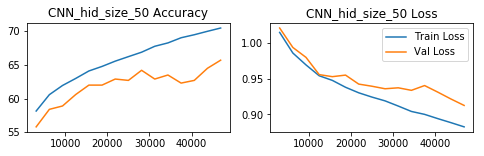

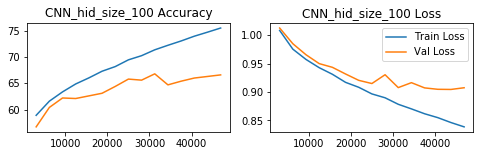

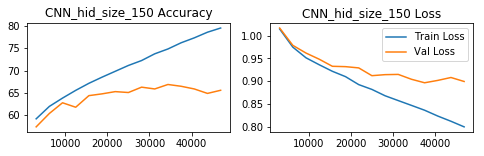

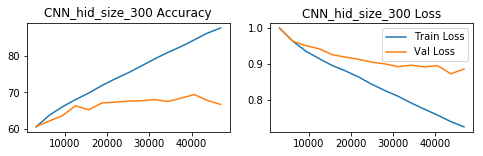

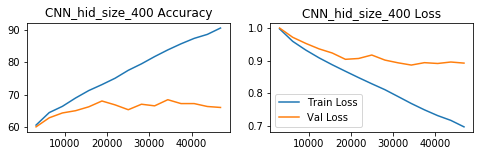

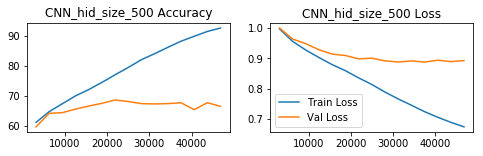

,50,100,150,300,400,500
max accuracy,65.7,66.8,66.9,69.4,68.4,68.7
no. of parameters,6058403,6131003,6218603,6571403,6881603,7251803


In [11]:
result_reader('CNN_hid_size_', [str(x) for x in [50, 100, 150, 300, 400, 500]])

### 4.2 RNN hidden size

In [12]:
for i_hid_size in [50, 100, 200, 400, 500, 600]:
    run_name = 'GRU_hid_size_' + str(i_hid_size)
    torch.backends.cudnn.benchmark = True
    weight = torch.FloatTensor(lookup).cuda()
    model = GRU(weight = weight, hidden_size=i_hid_size).cuda()
    learning_rate = 0.0005
    num_epochs = 15 # number epoch to train
    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # freeze
    freeze_mat = torch.cat([torch.zeros([1, 300]), torch.ones([1, 300]), torch.zeros([20000, 300])]).cuda()
    h = model.embedding.weight.register_hook(lambda grad: grad * freeze_mat)

    # Plot prepare
    it = 0
    res = {
        'it_list' : [],
        'train_loss_list' : [],
        'val_loss_list' : [],
        'train_acc_list' : [],
        'val_acc_list' : [] 
    }
    # print(model.embedding.weight[:3, :5])
    for epoch in range(num_epochs):
        for i, (x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels) in enumerate(snli_train_loader):
            it += 1
            model.train()
            optimizer.zero_grad()
            # Forward pass
            outputs = model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                            y.cuda(), y_lengths.cuda(), rev_order_y.cuda())
            loss = criterion(outputs, labels.cuda())
            # Backward and optimize
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
                print('.', end='')
        # validate
        train_acc, train_loss = test_model(snli_train_loader, model)
        val_acc, val_loss = test_model(snli_val_loader, model)
        print('\nEpoch: [{}/{}], Validation Acc: {}'.format(
            epoch+1, num_epochs, val_acc))
        # Plot prepare
        res['it_list'].append(it)
        res['train_acc_list'].append(train_acc)
        res['train_loss_list'].append(train_loss)
        res['val_acc_list'].append(val_acc)
        res['val_loss_list'].append(val_loss)
    torch.save(model.state_dict(), '../model/'+run_name+'_para.pt')
    pkl.dump(res, open('../model/'+run_name+'_res.pkl', 'wb'))

................................
Epoch: [1/15], Validation Acc: 58.1
................................
Epoch: [2/15], Validation Acc: 60.9
................................
Epoch: [3/15], Validation Acc: 61.1
................................
Epoch: [4/15], Validation Acc: 62.4
................................
Epoch: [5/15], Validation Acc: 64.1
................................
Epoch: [6/15], Validation Acc: 63.4
................................
Epoch: [7/15], Validation Acc: 66.5
................................
Epoch: [8/15], Validation Acc: 65.7
................................
Epoch: [9/15], Validation Acc: 66.9
................................
Epoch: [10/15], Validation Acc: 65.8
................................
Epoch: [11/15], Validation Acc: 65.9
................................
Epoch: [12/15], Validation Acc: 67.7
................................
Epoch: [13/15], Validation Acc: 68.7
................................
Epoch: [14/15], Validation Acc: 66.6
.............................

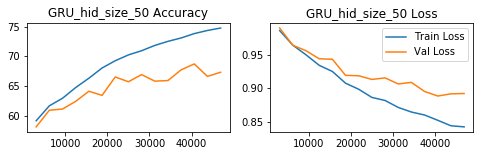

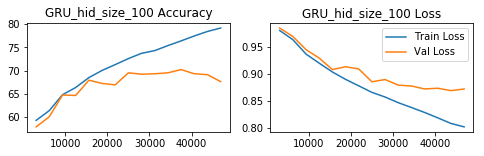

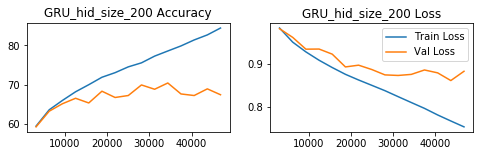

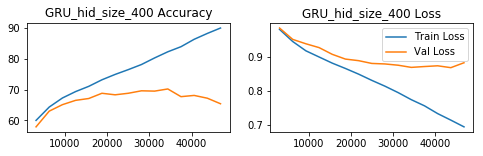

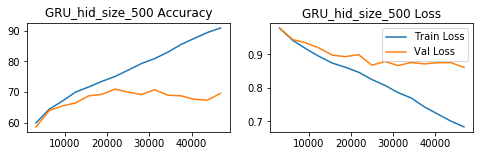

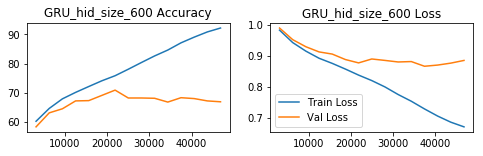

,50,100,200,400,500,600
max accuracy,68.7,70.2,70.4,70.2,71,70.9
no. of parameters,6126603,6282203,6683403,7845803,8607003,9488203


In [12]:
result_reader('GRU_hid_size_' , [str(x) for x in [50, 100, 200, 400, 500, 600]])

### 4.3 CNN Kernel Size

In [11]:
class CNN_kernel(nn.Module):
    def __init__(self, weight, hidden_size, kernel_size):
        '''
        CNN_kernel Model
        '''
        super(CNN_kernel, self).__init__()
        self.hidden_size = hidden_size
        self.kernel_size = kernel_size
        self.embedding = nn.Embedding.from_pretrained(weight, freeze = False)
        emb_size = weight.shape[1]
        self.conv1 = nn.Conv1d(emb_size, hidden_size, kernel_size=kernel_size, padding=int((kernel_size-1)/2)) 
        self.conv2 = nn.Conv1d(hidden_size, hidden_size, kernel_size=kernel_size, padding=int((kernel_size-1)/2))
        self.linear1 = nn.Linear(hidden_size * 2 , out_features=50)
        self.linear2 = nn.Linear(50, out_features=3)
        
    def forward(self, x, x_lengths, rev_order_x,  y, y_lengths, rev_order_y):
        batch_size, seq_len = x.size()
        
        x = x[rev_order_x]
        y = y[rev_order_y]
        
        embed_x = self.embedding(x)
        embed_y = self.embedding(y)
                
        hidden_x = self.conv1(embed_x.transpose(1, 2)).transpose(1, 2) 
        hidden_x = F.relu(hidden_x)
        
        hidden_x = self.conv2(hidden_x.transpose(1, 2)).transpose(1, 2) 
        hidden_x = F.relu(hidden_x)
        
        hidden_x = torch.max(hidden_x, dim=1)[0]
                
        # The same for y
        
        hidden_y = self.conv1(embed_y.transpose(1, 2)).transpose(1, 2) 
        hidden_y = F.relu(hidden_y)
                
        hidden_y = self.conv2(hidden_y.transpose(1, 2)).transpose(1, 2) 
        hidden_y = F.relu(hidden_y)
        
        hidden_y = torch.max(hidden_y, dim=1)[0]
                
        # Concat x and y before linear transformation
        output = torch.cat([hidden_x, hidden_y], dim = 1) 
        
        output = self.linear1(output)
        output = F.softmax(output, dim=0)
        res = self.linear2(output)
        
        return res

In [12]:
for i_ker_size in [3, 5, 7, 9]:
    run_name = 'CNN_ker_size_' + str(i_ker_size)
    torch.backends.cudnn.benchmark = True
    weight = torch.FloatTensor(lookup).cuda()
    model = CNN_kernel(weight = weight, hidden_size=300, kernel_size = i_ker_size).cuda()
    learning_rate = 0.0002
    num_epochs = 15
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    freeze_mat = torch.cat([torch.zeros([1, 300]), torch.ones([1, 300]), torch.zeros([20000, 300])]).cuda()
    h = model.embedding.weight.register_hook(lambda grad: grad * freeze_mat)
    it = 0
    res = {
        'it_list' : [],
        'train_loss_list' : [],
        'val_loss_list' : [],
        'train_acc_list' : [],
        'val_acc_list' : [] 
    }
    for epoch in range(num_epochs):
        train_acc = 0
        train_loss = 0
        for i, (x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels) in enumerate(snli_train_loader):
            it += 1
            model.train()
            optimizer.zero_grad()
            outputs = model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                            y.cuda(), y_lengths.cuda(), rev_order_y.cuda())
            loss = criterion(outputs, labels.cuda())
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
                print('.', end='')
        # validate
        train_acc, train_loss = test_model(snli_train_loader, model)
        val_acc, val_loss = test_model(snli_val_loader, model)
        print('\nEpoch: [{}/{}], Validation Acc: {}'.format(
            epoch+1, num_epochs, val_acc))
        # Plot prepare
        res['it_list'].append(it)
        res['train_acc_list'].append(train_acc)
        res['train_loss_list'].append(train_loss)
        res['val_acc_list'].append(val_acc)
        res['val_loss_list'].append(val_loss)
    # after training, save the model 
    torch.save(model.state_dict(), '../model/'+run_name+'_para.pt')
    pkl.dump(res, open('../model/'+run_name+'_res.pkl', 'wb'))

................................
Epoch: [1/15], Validation Acc: 57.0
................................
Epoch: [2/15], Validation Acc: 62.8
................................
Epoch: [3/15], Validation Acc: 65.0
................................
Epoch: [4/15], Validation Acc: 64.6
................................
Epoch: [5/15], Validation Acc: 66.5
................................
Epoch: [6/15], Validation Acc: 66.0
................................
Epoch: [7/15], Validation Acc: 66.4
................................
Epoch: [8/15], Validation Acc: 67.3
................................
Epoch: [9/15], Validation Acc: 67.2
................................
Epoch: [10/15], Validation Acc: 67.0
................................
Epoch: [11/15], Validation Acc: 66.0
................................
Epoch: [12/15], Validation Acc: 64.8
................................
Epoch: [13/15], Validation Acc: 64.3
................................
Epoch: [14/15], Validation Acc: 65.5
.............................

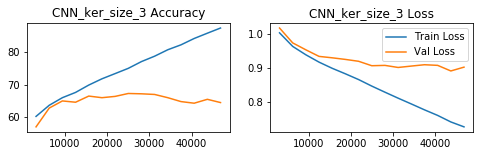

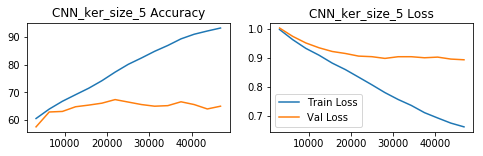

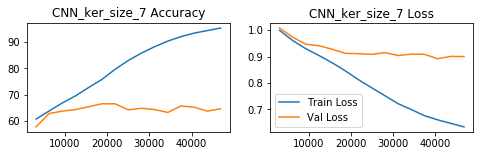

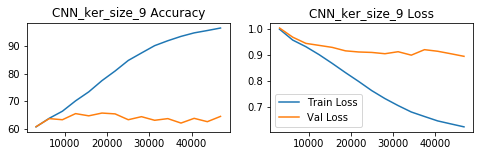

,3,5,7,9
max accuracy,67.3,67.4,66.5,65.8
no. of parameters,6571403,6931403,7291403,7651403


In [82]:
result_reader('CNN_ker_size_', [str(x) for x in [3, 5, 7, 9] ])

### 4.4 Interacting the two encoded sentences: CNN

In [83]:
class CNN_inter(nn.Module):
    def __init__(self, weight, hidden_size, inter):
        '''
        CNN_inter Model
        '''
        super(CNN_inter, self).__init__()
        self.hidden_size = hidden_size
        self.inter = inter
        self.embedding = nn.Embedding.from_pretrained(weight, freeze = False)
        emb_size = weight.shape[1]
        self.conv1 = nn.Conv1d(emb_size, hidden_size, kernel_size=5, padding=2) 
        self.conv2 = nn.Conv1d(hidden_size, hidden_size, kernel_size=5, padding=2)
        
        linear_input = hidden_size * 2 if inter == 'concat' else hidden_size
        self.linear1 = nn.Linear(linear_input , out_features=50)
        self.linear2 = nn.Linear(50, out_features=3)
        
    def forward(self, x, x_lengths, rev_order_x,  y, y_lengths, rev_order_y):
        batch_size, seq_len = x.size()
        
        x = x[rev_order_x]
        y = y[rev_order_y]
        
        embed_x = self.embedding(x)
        embed_y = self.embedding(y)
                
        hidden_x = self.conv1(embed_x.transpose(1, 2)).transpose(1, 2) 
        hidden_x = F.relu(hidden_x)
        
        hidden_x = self.conv2(hidden_x.transpose(1, 2)).transpose(1, 2) 
        hidden_x = F.relu(hidden_x)
        
        hidden_x = torch.max(hidden_x, dim=1)[0]
                
        # The same for y
        
        hidden_y = self.conv1(embed_y.transpose(1, 2)).transpose(1, 2) 
        hidden_y = F.relu(hidden_y)
                
        hidden_y = self.conv2(hidden_y.transpose(1, 2)).transpose(1, 2) 
        hidden_y = F.relu(hidden_y)
        
        hidden_y = torch.max(hidden_y, dim=1)[0]
                
        # Interact x and y before linear transformation
        if self.inter == 'concat':
            output = torch.cat([hidden_x, hidden_y], dim = 1)
        elif self.inter == 'ewMul':
            output = hidden_x.mul(hidden_y)
        elif self.inter == 'ewDistance':
            output = hidden_x.sub(hidden_y).abs()
        
        output = self.linear1(output)
        output = F.softmax(output, dim=0)
        res = self.linear2(output)
        
        return res

In [84]:
for i_inter in ['concat', 'ewMul', 'ewDistance']:
    run_name = 'CNN_inter_' + str(i_inter)
    torch.backends.cudnn.benchmark = True
    weight = torch.FloatTensor(lookup).cuda()
    model = CNN_inter(weight = weight, hidden_size=300, inter=i_inter).cuda()
    learning_rate = 0.0002
    num_epochs = 15
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    freeze_mat = torch.cat([torch.zeros([1, 300]), torch.ones([1, 300]), torch.zeros([20000, 300])]).cuda()
    h = model.embedding.weight.register_hook(lambda grad: grad * freeze_mat)
    it = 0
    res = {
        'it_list' : [],
        'train_loss_list' : [],
        'val_loss_list' : [],
        'train_acc_list' : [],
        'val_acc_list' : [] 
    }
    for epoch in range(num_epochs):
        train_acc = 0
        train_loss = 0
        for i, (x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels) in enumerate(snli_train_loader):
            it += 1
            model.train()
            optimizer.zero_grad()
            outputs = model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                            y.cuda(), y_lengths.cuda(), rev_order_y.cuda())
            loss = criterion(outputs, labels.cuda())
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
                print('.', end='')
        # validate
        train_acc, train_loss = test_model(snli_train_loader, model)
        val_acc, val_loss = test_model(snli_val_loader, model)
        print('\nEpoch: [{}/{}], Validation Acc: {}'.format(
            epoch+1, num_epochs, val_acc))
        # Plot prepare
        res['it_list'].append(it)
        res['train_acc_list'].append(train_acc)
        res['train_loss_list'].append(train_loss)
        res['val_acc_list'].append(val_acc)
        res['val_loss_list'].append(val_loss)
    # after training, save the model 
    torch.save(model.state_dict(), '../model/'+run_name+'_para.pt')
    pkl.dump(res, open('../model/'+run_name+'_res.pkl', 'wb'))

................................
Epoch: [1/15], Validation Acc: 58.5
................................
Epoch: [2/15], Validation Acc: 61.9
................................
Epoch: [3/15], Validation Acc: 63.1
................................
Epoch: [4/15], Validation Acc: 66.7
................................
Epoch: [5/15], Validation Acc: 66.9
................................
Epoch: [6/15], Validation Acc: 67.1
................................
Epoch: [7/15], Validation Acc: 65.6
................................
Epoch: [8/15], Validation Acc: 65.1
................................
Epoch: [9/15], Validation Acc: 66.9
................................
Epoch: [10/15], Validation Acc: 65.0
................................
Epoch: [11/15], Validation Acc: 67.1
................................
Epoch: [12/15], Validation Acc: 66.4
................................
Epoch: [13/15], Validation Acc: 64.4
................................
Epoch: [14/15], Validation Acc: 65.0
.............................

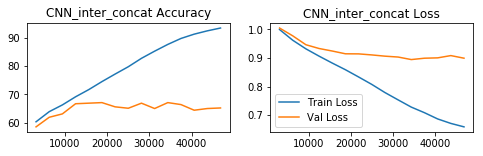

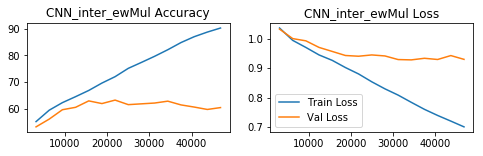

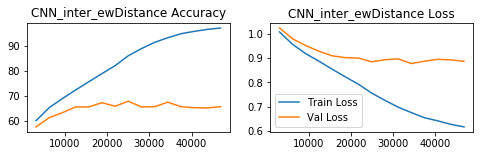

,concat,ewMul,ewDistance
max accuracy,67.1,63.3,67.9
no. of parameters,6931403,6916403,6916403


In [86]:
result_reader('CNN_inter_', [str(x) for x in ['concat', 'ewMul', 'ewDistance']])

### 4.5 Interacting the two encoded sentences: RNN

In [12]:
class GRU_inter(nn.Module):
    def __init__(self, weight, hidden_size, inter):
        '''
        GRU_inter Model
        '''
        super(GRU_inter, self).__init__()
        self.hidden_size = hidden_size
        self.inter = inter
        self.embedding = nn.Embedding.from_pretrained(weight, freeze = False)
        emb_size = weight.shape[1]
        self.gru = nn.GRU(emb_size, hidden_size, num_layers = 1, batch_first=True, bidirectional= True) 
        # The first dimension is batch dimension
        linear_input = hidden_size * 2 * 2 if inter == 'concat' else hidden_size * 2
        self.linear1 = nn.Linear(linear_input, out_features=100)
        self.linear2 = nn.Linear(100, out_features=3)

    def init_hidden(self, batch_size, cuda = True):
        # Function initializes the activation of recurrent neural net at timestep 0
        # Needs to be in format (num_layers, batch_size, hidden_size)
        if cuda:
            hidden = torch.randn(2, batch_size, self.hidden_size).cuda()
        else:
            hidden = torch.randn(2, batch_size, self.hidden_size)
        return hidden

    def forward(self, x, x_lengths, rev_order_x,  y, y_lengths, rev_order_y):
        batch_size, seq_len = x.size()
        self.hidden_1 = self.init_hidden(batch_size, x.is_cuda)

        # get embedding of characters
        embed_x = self.embedding(x)
        embed_y = self.embedding(y)
        
        # Sort before RNN
        embed_x = torch.nn.utils.rnn.pack_padded_sequence(embed_x, x_lengths, batch_first=True)
        # GRU
        _, hidden_x = self.gru(embed_x, self.hidden_1)
        # output_x, _ = torch.nn.utils.rnn.pad_packed_sequence(output_x, batch_first=True)
        # Get the last hidden 
        out_x = hidden_x.transpose(0, 1)
        out_x = out_x.contiguous().view(batch_size, -1)
        out_x = out_x[rev_order_x]
        
        #The same for y (Do we need to re-initialize the hidden?)
        self.hidden_2 = self.init_hidden(batch_size, x.is_cuda)
        embed_y = torch.nn.utils.rnn.pack_padded_sequence(embed_y, y_lengths, batch_first=True)
        _, hidden_y = self.gru(embed_y, self.hidden_2)
        # output_y, _ = torch.nn.utils.rnn.pad_packed_sequence(output_y, batch_first=True)
        out_y = hidden_y.transpose(0, 1)
        out_y = out_y.contiguous().view(batch_size, -1)
        out_y = out_y[rev_order_y]
        
        # Interact x and y before linear transformation
        if self.inter == 'concat':
            output = torch.cat([out_x, out_y], dim = 1)
        elif self.inter == 'ewMul':
            output = out_x.mul(out_y)
        elif self.inter == 'ewDistance':
            output = out_x.sub(out_y).abs()

        output = self.linear1(output)
        output = F.softmax(output, dim = 0)
        res = self.linear2(output)
        
        return res

In [35]:
for i_inter in ['concat', 'ewMul', 'ewDistance']:
    run_name = 'GRU_inter_' + str(i_inter)
    torch.backends.cudnn.benchmark = True
    weight = torch.FloatTensor(lookup).cuda()
    model = GRU_inter(weight = weight, hidden_size=500, inter=i_inter).cuda()
    learning_rate = 0.0005
    num_epochs = 15 # number epoch to train
    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # freeze
    freeze_mat = torch.cat([torch.zeros([1, 300]), torch.ones([1, 300]), torch.zeros([20000, 300])]).cuda()
    h = model.embedding.weight.register_hook(lambda grad: grad * freeze_mat)

    # Plot prepare
    it = 0
    res = {
        'it_list' : [],
        'train_loss_list' : [],
        'val_loss_list' : [],
        'train_acc_list' : [],
        'val_acc_list' : [] 
    }
    # print(model.embedding.weight[:3, :5])
    for epoch in range(num_epochs):
        for i, (x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels) in enumerate(snli_train_loader):
            it += 1
            model.train()
            optimizer.zero_grad()
            # Forward pass
            outputs = model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                            y.cuda(), y_lengths.cuda(), rev_order_y.cuda())
            loss = criterion(outputs, labels.cuda())
            # Backward and optimize
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
                print('.', end='')
        # validate
        train_acc, train_loss = test_model(snli_train_loader, model)
        val_acc, val_loss = test_model(snli_val_loader, model)
        print('\nEpoch: [{}/{}], Validation Acc: {}'.format(
            epoch+1, num_epochs, val_acc))
        # Plot prepare
        res['it_list'].append(it)
        res['train_acc_list'].append(train_acc)
        res['train_loss_list'].append(train_loss)
        res['val_acc_list'].append(val_acc)
        res['val_loss_list'].append(val_loss)
    torch.save(model.state_dict(), '../model/'+run_name+'_para.pt')
    pkl.dump(res, open('../model/'+run_name+'_res.pkl', 'wb'))

................................
Epoch: [1/15], Validation Acc: 59.7
................................
Epoch: [2/15], Validation Acc: 61.6
................................
Epoch: [3/15], Validation Acc: 65.4
................................
Epoch: [4/15], Validation Acc: 67.2
................................
Epoch: [5/15], Validation Acc: 67.7
................................
Epoch: [6/15], Validation Acc: 69.8
................................
Epoch: [7/15], Validation Acc: 69.6
................................
Epoch: [8/15], Validation Acc: 69.7
................................
Epoch: [9/15], Validation Acc: 68.7
................................
Epoch: [10/15], Validation Acc: 68.7
................................
Epoch: [11/15], Validation Acc: 69.6
................................
Epoch: [12/15], Validation Acc: 67.9
................................
Epoch: [13/15], Validation Acc: 69.6
................................
Epoch: [14/15], Validation Acc: 68.9
.............................

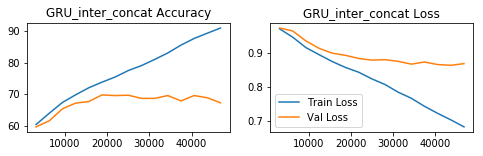

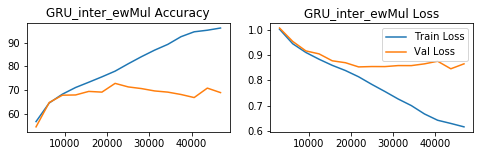

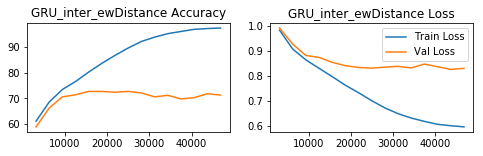

,concat,ewMul,ewDistance
max accuracy,69.8,72.8,72.7
no. of parameters,8607003,8507003,8507003


In [87]:
result_reader('GRU_inter_', [str(x)for x in ['concat', 'ewMul', 'ewDistance']]) 

### 4.6 CNN: FC Activation

In [14]:
class CNN_act(nn.Module):
    def __init__(self, weight, hidden_size, act):
        '''
        CNN_act Model
        '''
        super(CNN_act, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding.from_pretrained(weight, freeze = False)
        emb_size = weight.shape[1]
        self.conv1 = nn.Conv1d(emb_size, hidden_size, kernel_size=3, padding=1) 
        self.conv2 = nn.Conv1d(hidden_size, hidden_size, kernel_size=3, padding=1)
        self.act = act
        linear_input = hidden_size
        self.linear1 = nn.Linear(linear_input , out_features=50)
        self.linear2 = nn.Linear(50, out_features=3)
        
    def forward(self, x, x_lengths, rev_order_x,  y, y_lengths, rev_order_y):
        batch_size, seq_len = x.size()
        
        x = x[rev_order_x]
        y = y[rev_order_y]
        
        embed_x = self.embedding(x)
        embed_y = self.embedding(y)
                
        hidden_x = self.conv1(embed_x.transpose(1, 2)).transpose(1, 2) 
        hidden_x = F.relu(hidden_x)
        
        hidden_x = self.conv2(hidden_x.transpose(1, 2)).transpose(1, 2) 
        hidden_x = F.relu(hidden_x)
        
        hidden_x = torch.max(hidden_x, dim=1)[0]
                
        # The same for y
        
        hidden_y = self.conv1(embed_y.transpose(1, 2)).transpose(1, 2) 
        hidden_y = F.relu(hidden_y)
                
        hidden_y = self.conv2(hidden_y.transpose(1, 2)).transpose(1, 2) 
        hidden_y = F.relu(hidden_y)
        
        hidden_y = torch.max(hidden_y, dim=1)[0]
                
        # Interact x and y before linear transformation
        output = hidden_x.sub(hidden_y).abs()

        
        output = self.linear1(output)
        if self.act == 'Softmax':
            output = F.softmax(output, dim=0)
        elif self.act == 'ReLu':
            output = F.relu(output)
        res = self.linear2(output)
        
        return res

In [53]:
for i_act in ['Softmax', 'ReLu']:
    run_name = 'CNN_act_' + str(i_act)
    torch.backends.cudnn.benchmark = True
    weight = torch.FloatTensor(lookup).cuda()
    model = CNN_act(weight = weight, hidden_size=300, act=i_act).cuda()
    learning_rate = 0.0002
    num_epochs = 15
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    freeze_mat = torch.cat([torch.zeros([1, 300]), torch.ones([1, 300]), torch.zeros([20000, 300])]).cuda()
    h = model.embedding.weight.register_hook(lambda grad: grad * freeze_mat)
    it = 0
    res = {
        'it_list' : [],
        'train_loss_list' : [],
        'val_loss_list' : [],
        'train_acc_list' : [],
        'val_acc_list' : [] 
    }
    for epoch in range(num_epochs):
        train_acc = 0
        train_loss = 0
        for i, (x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels) in enumerate(snli_train_loader):
            it += 1
            model.train()
            optimizer.zero_grad()
            outputs = model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                            y.cuda(), y_lengths.cuda(), rev_order_y.cuda())
            loss = criterion(outputs, labels.cuda())
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
                print('.', end='')
        # validate
        train_acc, train_loss = test_model(snli_train_loader, model)
        val_acc, val_loss = test_model(snli_val_loader, model)
        print('\nEpoch: [{}/{}], Validation Acc: {}'.format(
            epoch+1, num_epochs, val_acc))
        # Plot prepare
        res['it_list'].append(it)
        res['train_acc_list'].append(train_acc)
        res['train_loss_list'].append(train_loss)
        res['val_acc_list'].append(val_acc)
        res['val_loss_list'].append(val_loss)
    # after training, save the model 
    torch.save(model.state_dict(), '../model/'+run_name+'_para.pt')
    pkl.dump(res, open('../model/'+run_name+'_res.pkl', 'wb'))

................................
Epoch: [1/15], Validation Acc: 58.5
................................
Epoch: [2/15], Validation Acc: 63.0
................................
Epoch: [3/15], Validation Acc: 63.5
................................
Epoch: [4/15], Validation Acc: 66.6
................................
Epoch: [5/15], Validation Acc: 66.7
................................
Epoch: [6/15], Validation Acc: 66.7
................................
Epoch: [7/15], Validation Acc: 68.7
................................
Epoch: [8/15], Validation Acc: 67.8
................................
Epoch: [9/15], Validation Acc: 68.1
................................
Epoch: [10/15], Validation Acc: 67.1
................................
Epoch: [11/15], Validation Acc: 68.4
................................
Epoch: [12/15], Validation Acc: 67.9
................................
Epoch: [13/15], Validation Acc: 66.6
................................
Epoch: [14/15], Validation Acc: 66.8
.............................

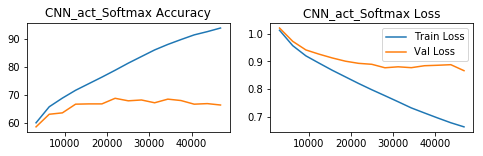

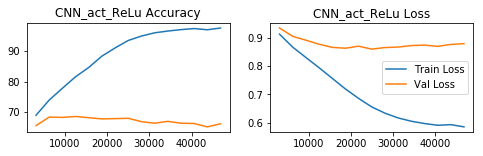

,Softmax,ReLu
max accuracy,68.7,68.6
no. of parameters,6556403,6556403


In [54]:
result_reader('CNN_act_', [str(x) for x in ['Softmax', 'ReLu']]) 

### 4.7 RNN: FC Activation

In [19]:
class GRU_act(nn.Module):
    def __init__(self, weight, hidden_size, act):
        '''
        GRU_act Model
        '''
        super(GRU_act, self).__init__()
        self.hidden_size = hidden_size
        self.act = act
        self.embedding = nn.Embedding.from_pretrained(weight, freeze = False)
        emb_size = weight.shape[1]
        self.gru = nn.GRU(emb_size, hidden_size, num_layers = 1, batch_first=True, bidirectional= True) 
        # The first dimension is batch dimension
        linear_input = hidden_size * 2
        self.linear1 = nn.Linear(linear_input, out_features=100)
        self.linear2 = nn.Linear(100, out_features=3)

    def init_hidden(self, batch_size, cuda = True):
        # Function initializes the activation of recurrent neural net at timestep 0
        # Needs to be in format (num_layers, batch_size, hidden_size)
        if cuda:
            hidden = torch.randn(2, batch_size, self.hidden_size).cuda()
        else:
            hidden = torch.randn(2, batch_size, self.hidden_size)
        return hidden

    def forward(self, x, x_lengths, rev_order_x,  y, y_lengths, rev_order_y):
        batch_size, seq_len = x.size()
        self.hidden_1 = self.init_hidden(batch_size, x.is_cuda)

        # get embedding of characters
        embed_x = self.embedding(x)
        embed_y = self.embedding(y)
        
        # Sort before RNN
        embed_x = torch.nn.utils.rnn.pack_padded_sequence(embed_x, x_lengths, batch_first=True)
        # GRU
        _, hidden_x = self.gru(embed_x, self.hidden_1)
        # output_x, _ = torch.nn.utils.rnn.pad_packed_sequence(output_x, batch_first=True)
        # Get the last hidden 
        out_x = hidden_x.transpose(0, 1)
        out_x = out_x.contiguous().view(batch_size, -1)
        out_x = out_x[rev_order_x]
        
        #The same for y (Do we need to re-initialize the hidden?)
        self.hidden_2 = self.init_hidden(batch_size, x.is_cuda)
        embed_y = torch.nn.utils.rnn.pack_padded_sequence(embed_y, y_lengths, batch_first=True)
        _, hidden_y = self.gru(embed_y, self.hidden_2)
        # output_y, _ = torch.nn.utils.rnn.pad_packed_sequence(output_y, batch_first=True)
        out_y = hidden_y.transpose(0, 1)
        out_y = out_y.contiguous().view(batch_size, -1)
        out_y = out_y[rev_order_y]
        
        # Interact x and y before linear transformation
        output = out_x.mul(out_y)

        output = self.linear1(output)
        if self.act == 'Softmax':
            output = F.softmax(output, dim=0)
        elif self.act == 'ReLu':
            output = F.relu(output)
        res = self.linear2(output)
        
        return res

In [19]:
for i_act in ['Softmax', 'ReLu']:
    run_name = 'GRU_act_' + str(i_act)
    torch.backends.cudnn.benchmark = True
    weight = torch.FloatTensor(lookup).cuda()
    model = GRU_act(weight = weight, hidden_size=500, act = i_act).cuda()
    learning_rate = 0.0005
    num_epochs = 15 # number epoch to train
    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # freeze
    freeze_mat = torch.cat([torch.zeros([1, 300]), torch.ones([1, 300]), torch.zeros([20000, 300])]).cuda()
    h = model.embedding.weight.register_hook(lambda grad: grad * freeze_mat)

    # Plot prepare
    it = 0
    res = {
        'it_list' : [],
        'train_loss_list' : [],
        'val_loss_list' : [],
        'train_acc_list' : [],
        'val_acc_list' : [] 
    }
    # print(model.embedding.weight[:3, :5])
    for epoch in range(num_epochs):
        for i, (x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels) in enumerate(snli_train_loader):
            it += 1
            model.train()
            optimizer.zero_grad()
            # Forward pass
            outputs = model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                            y.cuda(), y_lengths.cuda(), rev_order_y.cuda())
            loss = criterion(outputs, labels.cuda())
            # Backward and optimize
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
                print('.', end='')
        # validate
        train_acc, train_loss = test_model(snli_train_loader, model)
        val_acc, val_loss = test_model(snli_val_loader, model)
        print('\nEpoch: [{}/{}], Validation Acc: {}'.format(
            epoch+1, num_epochs, val_acc))
        # Plot prepare
        res['it_list'].append(it)
        res['train_acc_list'].append(train_acc)
        res['train_loss_list'].append(train_loss)
        res['val_acc_list'].append(val_acc)
        res['val_loss_list'].append(val_loss)
    torch.save(model.state_dict(), '../model/'+run_name+'_para.pt')
    pkl.dump(res, open('../model/'+run_name+'_res.pkl', 'wb'))

................................
Epoch: [1/15], Validation Acc: 58.5
................................
Epoch: [2/15], Validation Acc: 63.6
................................
Epoch: [3/15], Validation Acc: 66.3
................................
Epoch: [4/15], Validation Acc: 68.4
................................
Epoch: [5/15], Validation Acc: 69.4
................................
Epoch: [6/15], Validation Acc: 70.1
................................
Epoch: [7/15], Validation Acc: 69.5
................................
Epoch: [8/15], Validation Acc: 71.6
................................
Epoch: [9/15], Validation Acc: 70.1
................................
Epoch: [10/15], Validation Acc: 71.5
................................
Epoch: [11/15], Validation Acc: 70.3
................................
Epoch: [12/15], Validation Acc: 70.5
................................
Epoch: [13/15], Validation Acc: 69.1
................................
Epoch: [14/15], Validation Acc: 71.0
.............................

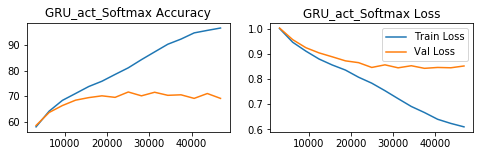

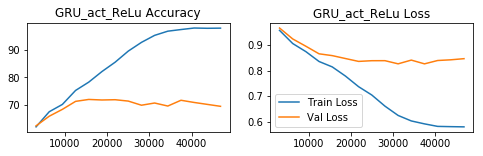

,Softmax,ReLu
max accuracy,71.6,72
no. of parameters,8507003,8507003


In [91]:
result_reader('GRU_act_', [str(x) for x in ['Softmax', 'ReLu']])

## 5 Best Model

### 5.1 Best GRU

In [27]:
run_name = 'GRU_best_'
torch.backends.cudnn.benchmark = True
weight = torch.FloatTensor(lookup).cuda()
model = GRU_act(weight = weight, hidden_size=500, act = 'ReLu').cuda()
learning_rate = 0.0005
num_epochs = 10 # number epoch to train
# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# freeze
freeze_mat = torch.cat([torch.zeros([1, 300]), torch.ones([1, 300]), torch.zeros([20000, 300])]).cuda()
h = model.embedding.weight.register_hook(lambda grad: grad * freeze_mat)

# Plot prepare
it = 0
res = {
    'it_list' : [],
    'train_loss_list' : [],
    'val_loss_list' : [],
    'train_acc_list' : [],
    'val_acc_list' : [] 
}
# print(model.embedding.weight[:3, :5])
for epoch in range(num_epochs):
    for i, (x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels) in enumerate(snli_train_loader):
        it += 1
        model.train()
        optimizer.zero_grad()
        # Forward pass
        outputs = model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                        y.cuda(), y_lengths.cuda(), rev_order_y.cuda())
        loss = criterion(outputs, labels.cuda())
        # Backward and optimize
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print('.', end='')
    # validate
    train_acc, train_loss = test_model(snli_train_loader, model)
    val_acc, val_loss = test_model(snli_val_loader, model)
    print('\nEpoch: [{}/{}], Validation Acc: {}'.format(
        epoch+1, num_epochs, val_acc))
    # Plot prepare
    res['it_list'].append(it)
    res['train_acc_list'].append(train_acc)
    res['train_loss_list'].append(train_loss)
    res['val_acc_list'].append(val_acc)
    res['val_loss_list'].append(val_loss)
    torch.save(model.state_dict(), '../model/'+run_name+'_epoch_' + str(epoch) + '_para.pt')
torch.save(model.state_dict(), '../model/'+run_name+'_para.pt')
pkl.dump(res, open('../model/'+run_name+'_res.pkl', 'wb'))

................................
Epoch: [1/10], Validation Acc: 61.4
................................
Epoch: [2/10], Validation Acc: 67.2
................................
Epoch: [3/10], Validation Acc: 70.2
................................
Epoch: [4/10], Validation Acc: 68.8
................................
Epoch: [5/10], Validation Acc: 70.9
................................
Epoch: [6/10], Validation Acc: 69.4
................................
Epoch: [7/10], Validation Acc: 71.5
................................
Epoch: [8/10], Validation Acc: 70.9
................................
Epoch: [9/10], Validation Acc: 71.3
................................
Epoch: [10/10], Validation Acc: 68.9


### 5.2 Best CNN

In [55]:
run_name = 'CNN_best_'
torch.backends.cudnn.benchmark = True
weight = torch.FloatTensor(lookup).cuda()
model = CNN_act(weight = weight, hidden_size=300, act = 'Softmax').cuda()
learning_rate = 0.0002
num_epochs = 15
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
freeze_mat = torch.cat([torch.zeros([1, 300]), torch.ones([1, 300]), torch.zeros([20000, 300])]).cuda()
h = model.embedding.weight.register_hook(lambda grad: grad * freeze_mat)
it = 0
res = {
    'it_list' : [],
    'train_loss_list' : [],
    'val_loss_list' : [],
    'train_acc_list' : [],
    'val_acc_list' : [] 
}
for epoch in range(num_epochs):
    train_acc = 0
    train_loss = 0
    for i, (x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels) in enumerate(snli_train_loader):
        it += 1
        model.train()
        optimizer.zero_grad()
        outputs = model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                        y.cuda(), y_lengths.cuda(), rev_order_y.cuda())
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print('.', end='')
    # validate
    train_acc, train_loss = test_model(snli_train_loader, model)
    val_acc, val_loss = test_model(snli_val_loader, model)
    print('\nEpoch: [{}/{}], Validation Acc: {}'.format(
        epoch+1, num_epochs, val_acc))
    # Plot prepare
    res['it_list'].append(it)
    res['train_acc_list'].append(train_acc)
    res['train_loss_list'].append(train_loss)
    res['val_acc_list'].append(val_acc)
    res['val_loss_list'].append(val_loss)
    torch.save(model.state_dict(), '../model/'+run_name+'_epoch_' + str(epoch) + '_para.pt')
# after training, save the model 
torch.save(model.state_dict(), '../model/'+run_name+'_para.pt')
pkl.dump(res, open('../model/'+run_name+'_res.pkl', 'wb'))

................................
Epoch: [1/15], Validation Acc: 57.6
................................
Epoch: [2/15], Validation Acc: 63.3
................................
Epoch: [3/15], Validation Acc: 66.0
................................
Epoch: [4/15], Validation Acc: 66.0
................................
Epoch: [5/15], Validation Acc: 67.1
................................
Epoch: [6/15], Validation Acc: 68.3
................................
Epoch: [7/15], Validation Acc: 67.7
................................
Epoch: [8/15], Validation Acc: 68.1
................................
Epoch: [9/15], Validation Acc: 68.4
................................
Epoch: [10/15], Validation Acc: 69.3
................................
Epoch: [11/15], Validation Acc: 68.7
................................
Epoch: [12/15], Validation Acc: 65.3
................................
Epoch: [13/15], Validation Acc: 66.1
................................
Epoch: [14/15], Validation Acc: 67.8
.............................

### 5.3 List 3 correct and incorrect samples of the best model (RNN)

In [56]:
def test_model_example(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    cor = []
    pre = []
    target_map = {0: 'neutral', 1: 'entailment', 2: 'contradiction'}
    model.eval()
    with torch.no_grad():
        for x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels in loader:
            labels_batch = labels.cuda()
            outputs = F.softmax(model(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                                      y.cuda(), y_lengths.cuda(), rev_order_y.cuda()), dim=1)
            predicted = outputs.max(1, keepdim=True)[1]
            correct = predicted.eq(labels_batch.view_as(predicted))
            cor += list(correct.view(1,-1).cpu().numpy()[0])
            pre += list(predicted.view(1, -1).cpu().numpy()[0])
    pre = [target_map[x] for x in pre]
    return cor, pre

In [57]:
weight = torch.FloatTensor(lookup).cuda()
model = GRU_act(weight = weight, hidden_size=500, act = '''''').cuda()
model.load_state_dict(torch.load('../model/GRU_best__epoch_6_para.pt'))

In [58]:
snli_val_dataset_noShuffle = inferDataset(snli_val_index_1, snli_val_index_2, snli_val_targets)
snli_val_loader_noShuffle = torch.utils.data.DataLoader(dataset=snli_val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=infer_collate_func,
                                           shuffle=False)
val_cor_gru, val_pre_gru = test_model_example(snli_val_loader_noShuffle, model)

In [114]:
tmp.sentence2.iloc[4]

'The traffic is halted and people are walking between the cars .'

In [59]:
snli_val_result = snli_val.copy()
snli_val_result['GRU'] = val_pre_gru


display(snli_val_result[snli_val_result['GRU']==snli_val_result['label']].head(10))
display(snli_val_result[snli_val_result['GRU']!=snli_val_result['label']].head(10))

,sentence1,sentence2,label,GRU
1,"Four people sit on a subway two read books , o...","Multiple people are on a subway together , wit...",entailment,entailment
2,bicycles stationed while a group of people soc...,People get together near a stand of bicycles .,entailment,entailment
3,Man in overalls with two horses .,a man in overalls with two horses,entailment,entailment
4,Man observes a wavelength given off by an elec...,The man is examining what wavelength is given ...,entailment,entailment
5,Two people are in a green forest .,The forest is not dead .,entailment,entailment
6,Two men are listening to music through headpho...,Two men listen to music .,entailment,entailment
8,A group of numbered participants walk down the...,Participants wait for the beginning of the wal...,neutral,neutral
9,Three people and a white dog are sitting in th...,Three dogs and a person are sitting in the snow .,contradiction,contradiction
10,A man wearing glasses is vacuuming an architec...,There is a man vaucuming,entailment,entailment
12,A little boy watches a Ferris Wheel in motion .,A boy is waiting in line for the Ferris Wheel .,neutral,neutral


,sentence1,sentence2,label,GRU
0,"Three women on a stage , one wearing red shoes...",There are two women standing on the stage,contradiction,entailment
7,"Two women , one walking her dog the other push...",There is a snowstorm .,contradiction,entailment
11,A large group of people stand outside on a roa...,One group of people are watching what another ...,entailment,neutral
13,Man in white shirt and blue jeans looking to t...,Man has a blue shirt on .,contradiction,entailment
23,People walk amongst a traffic jam in a crowded...,The traffic is halted and people are walking b...,entailment,contradiction
25,man grilling fish on barbecue,The man likes to eat fish .,neutral,entailment
26,"A lone , 2-3 year old blond child in a blue ja...",The couch is pointed toward the front .,contradiction,entailment
27,A chef speaks into a microphone about a mixed ...,a chef speaks into a microphone near a bowl,entailment,neutral
31,A middle-aged man is sitting indian style outs...,A middle aged man is showing off his origami c...,neutral,entailment
33,Persons standing underneath an arch way .,Persons are standing outdoors under a bridge a...,neutral,entailment


## 6 Validate on MultiNLI

In [60]:
mnli_val = pd.read_csv('../data/mnli_val.tsv', sep='\t', header=0)

genre_list  = list(set(mnli_val['genre']))

In [61]:
mnli_acc = pd.DataFrame(columns = genre_list)

In [87]:
mnli_rnn_acc = dict()
weight = torch.FloatTensor(lookup).cuda()
model_rnn = GRU_act(weight = weight, hidden_size=500, act='ReLu').cuda()
model_rnn.load_state_dict(torch.load('../model/GRU_best__epoch_6_para.pt'))
criterion = torch.nn.CrossEntropyLoss()
for genre_ in genre_list:
    
    mnli_val_tokens_1, mnli_val_tokens_2, mnli_val_targets = tokenize_preprocess(mnli_val[mnli_val['genre']==genre_])
    mnli_val_index_1 = tokens2index_dataset(mnli_val_tokens_1)
    mnli_val_index_2 = tokens2index_dataset(mnli_val_tokens_2)
    mnli_val_dataset = inferDataset(mnli_val_index_1, mnli_val_index_2, mnli_val_targets)
    mnli_val_loader = torch.utils.data.DataLoader(dataset=mnli_val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=infer_collate_func,
                                           shuffle=True)
    acc, _ = test_model(mnli_val_loader, model_rnn)
    mnli_rnn_acc[genre_] = acc
mnli_acc.loc['RNN'] = mnli_rnn_acc

In [85]:
mnli_cnn_acc = dict()
weight = torch.FloatTensor(lookup).cuda()
model_cnn = CNN_act(weight = weight, hidden_size=300, act = 'Softmax').cuda()
model_cnn.load_state_dict(torch.load('../model/CNN_best__epoch_9_para.pt'))
criterion = torch.nn.CrossEntropyLoss()
for genre_ in genre_list:
    
    mnli_val_tokens_1, mnli_val_tokens_2, mnli_val_targets = tokenize_preprocess(mnli_val[mnli_val['genre']==genre_])
    mnli_val_index_1 = tokens2index_dataset(mnli_val_tokens_1)
    mnli_val_index_2 = tokens2index_dataset(mnli_val_tokens_2)
    mnli_val_dataset = inferDataset(mnli_val_index_1, mnli_val_index_2, mnli_val_targets)
    mnli_val_loader = torch.utils.data.DataLoader(dataset=mnli_val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=infer_collate_func,
                                           shuffle=True)
    acc, _ = test_model(mnli_val_loader, model_cnn)
    mnli_cnn_acc[genre_] = acc
mnli_acc.loc['CNN'] = mnli_cnn_acc

In [88]:
mnli_acc

,telephone,slate,fiction,government,travel
RNN,43.084577,42.215569,46.934673,43.799213,44.602851
CNN,42.288557,43.113772,46.130653,46.850394,43.075356


## 7 Fine Tuning on Each Genre

In [89]:
mnli_train = pd.read_csv('../data/mnli_train.tsv', sep='\t', header=0)

In [94]:
mnli_ft_acc = dict()
for genre_ in genre_list:
    run_name = 'RNN_fine_tune_' + str(genre_)
    mnli_train_tokens_1, mnli_train_tokens_2, mnli_train_targets = tokenize_preprocess(mnli_train[mnli_train['genre']==genre_])
    mnli_train_index_1 = tokens2index_dataset(mnli_train_tokens_1)
    mnli_train_index_2 = tokens2index_dataset(mnli_train_tokens_2)
    mnli_train_dataset = inferDataset(mnli_train_index_1, mnli_train_index_2, mnli_train_targets)
    mnli_train_loader = torch.utils.data.DataLoader(dataset=mnli_train_dataset, 
                                           batch_size=16,
                                           collate_fn=infer_collate_func,
                                           shuffle=True)

    weight = torch.FloatTensor(lookup).cuda()
    model = GRU_act(weight = weight, hidden_size=500, act='ReLu').cuda()
    model.load_state_dict(torch.load('../model/GRU_best__epoch_6_para.pt'))    
    learning_rate = 1e-5
    num_epochs = 5 # number epoch to train
    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # freeze
    freeze_mat = torch.cat([torch.zeros([1, 300]), torch.ones([1, 300]), torch.zeros([20000, 300])]).cuda()
    h = model.embedding.weight.register_hook(lambda grad: grad * freeze_mat)

    # Plot prepare
    it = 0
    res = {
        'it_list' : [],
        'train_loss_list' : [],
        'val_loss_list' : [],
        'train_acc_list' : [],
        'val_acc_list' : [] 
    }
    # print(model.embedding.weight[:3, :5])
    for epoch in range(num_epochs):
        for i, (x, x_lengths, rev_order_x, y, y_lengths, rev_order_y, labels) in enumerate(mnli_train_loader):
            it += 1
            model.train()
            optimizer.zero_grad()
            # Forward pass
            outputs = model_cnn(x.cuda(), x_lengths.cuda(), rev_order_x.cuda(),
                            y.cuda(), y_lengths.cuda(), rev_order_y.cuda())
            loss = criterion(outputs, labels.cuda())
            # Backward and optimize
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
                print('.', end='')
        # validate
        train_acc, train_loss = test_model(mnli_train_loader, model)
        val_acc, val_loss = test_model(mnli_val_loader, model)
        print('\nEpoch: [{}/{}]'.format(
            epoch+1, num_epochs))
        # Plot prepare
        res['it_list'].append(it)
        res['train_acc_list'].append(train_acc)
        res['train_loss_list'].append(train_loss)
        res['val_acc_list'].append(val_acc)
        res['val_loss_list'].append(val_loss)
    print('The fine-tuned model: final accuracy on {}: {}\n'.format(genre_, res['val_acc_list'][-1]))
    mnli_ft_acc[genre_] = res['val_acc_list'][-1]
    torch.save(model.state_dict(), '../model/'+run_name+'_para.pt')
    pkl.dump(res, open('../model/'+run_name+'_res.pkl', 'wb'))

...
Epoch: [1/5]
...
Epoch: [2/5]
...
Epoch: [3/5]
...
Epoch: [4/5]
...
Epoch: [5/5]
The fine-tuned model: final accuracy on telephone: 44.908350305498985

...
Epoch: [1/5]
...
Epoch: [2/5]
...
Epoch: [3/5]
...
Epoch: [4/5]
...
Epoch: [5/5]
The fine-tuned model: final accuracy on slate: 44.806517311608964

...
Epoch: [1/5]
...
Epoch: [2/5]
...
Epoch: [3/5]
...
Epoch: [4/5]
...
Epoch: [5/5]
The fine-tuned model: final accuracy on fiction: 45.010183299389

...
Epoch: [1/5]
...
Epoch: [2/5]
...
Epoch: [3/5]
...
Epoch: [4/5]
...
Epoch: [5/5]
The fine-tuned model: final accuracy on government: 45.11201629327902

...
Epoch: [1/5]
...
Epoch: [2/5]
...
Epoch: [3/5]
...
Epoch: [4/5]
...
Epoch: [5/5]
The fine-tuned model: final accuracy on travel: 46.23217922606925



In [95]:
mnli_acc.loc['Fine-tune'] = mnli_ft_acc

In [96]:
mnli_acc

,telephone,slate,fiction,government,travel
RNN,43.084577,42.215569,46.934673,43.799213,44.602851
CNN,42.288557,43.113772,46.130653,46.850394,43.075356
Fine-tune,44.908350,44.806517,45.010183,45.112016,46.232179


<!-- Please use the pretrained vector
```
@inproceedings{mikolov2018advances,
  title={Advances in Pre-Training Distributed Word Representations},
  author={Mikolov, Tomas and Grave, Edouard and Bojanowski, Piotr and Puhrsch, Christian and Joulin, Armand},
  booktitle={Proceedings of the International Conference on Language Resources and Evaluation (LREC 2018)},
  year={2018}
}
```
-->